<a href="https://colab.research.google.com/github/Taimaraliz/BoostTech3/blob/main/trabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap




In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
#Criação do dataframe generico

def gerar_dataframe(qtd=100_00, seed=42):

    np.random.seed(seed)

    id_funcionario = np.arange(1, qtd + 1)
    idade = np.random.randint(18, 60, size=qtd)
    genero = np.random.choice(['Masculino', 'Feminino', 'Prefiro não informar'], size=qtd, p=[0.45, 0.35, 0.20])
    estado_civil = np.random.choice(['Solteiro(a)', 'Casado(a)', 'Divorciado(a)', 'Prefiro não informar'], size=qtd)
    escolaridade = np.random.choice(['Ensino Médio', 'Graduação', 'Pós', 'Mestrado', 'Doutorado', 'Prefiro não informar'], size=qtd)
    cor_raca = np.random.choice(['Branca', 'Preta', 'Parda', 'Amarela', 'Indígena', 'Prefiro não informar'], size=qtd)
    filhos = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    nacionalidade = np.random.choice(['Brasileira', 'Estrangeira', 'Prefiro não informar'], size=qtd)
    naturalidade = np.random.choice(['SP', 'RJ', 'MG', 'Outros', 'Prefiro não informar'], size=qtd)
    tipo_moradia = np.random.choice(['Alugada', 'Própria', 'Compartilhada', 'Prefiro não informar'], size=qtd)
    pcd = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.05, 0.95])
    estado_uf = np.random.choice(['SP', 'RJ', 'MG', 'BA', 'RS', 'CE', 'DF', 'PE', 'AM', 'MT', 'PR', 'AL', 'SC', ' ', 'Não informado'], size=qtd)

    area_formacao = np.random.choice([
        'Cientista de Dados/Data Scientist', 'Desenvolvedor', 'Engenharia de Software', 'Marketing',
        'RH', 'Product Manager/PO', 'Analista de Dados/Data Analyst', 'Administrativo', 'Financeiro',
        'Vendas', 'Pesquisa e Desenvolvimento', 'Engenharia de Dados/Data Engineer', 'UX/UI',
        'Suporte Técnico', 'Prefiro não informar'], size=qtd)

    departamento = np.random.choice(['Vendas', 'RH', 'TI', 'Pesquisa', 'Negócio', 'Administrativo'], size=qtd)
    cargo = np.random.choice([
        'Especialista', 'Gestor?', 'Cargo como Gestor', 'Tempo de experiência na área',
        'Gerente', 'Senior', 'Pleno', 'Junior', 'Estagiário', 'Prefiro não informar'], size=qtd)

    envolvimento = np.random.randint(1, 5, size=qtd)
    anos_empresa = np.random.randint(0, 41, size=qtd)
    promocoes = np.random.randint(0, 6, size=qtd)
    salario = np.random.randint(1500, 25000, size=qtd)
    faixa_salarial = pd.cut(salario, bins=[0, 3000, 7000, 12000, 18000, np.inf],
                            labels=['Muito baixa', 'Baixa', 'Média', 'Alta', 'Muito alta'])
    aumento = np.random.randint(0, 30, size=qtd)
    nivel_acao = np.random.randint(0, 4, size=qtd)

    sat_trabalho = np.random.randint(1, 6, size=qtd)
    sat_ambiente = np.random.randint(1, 6, size=qtd)
    sat_relacionamento = np.random.randint(1, 6, size=qtd)
    sat_beneficios = np.random.randint(1, 6, size=qtd)

    hora_extra = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.3, 0.7])
    equilibrio = np.random.randint(1, 5, size=qtd)
    viagem = np.random.choice(['Nunca', 'Raramente', 'Frequentemente'], size=qtd)
    distancia = np.random.randint(1, 50, size=qtd)
    avaliacao = np.random.choice([3, 4], size=qtd, p=[0.9, 0.1])
    treinamentos = np.random.randint(0, 6, size=qtd)

    pretende_mudar = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd, p=[0.3, 0.6, 0.1])
    futuro_empresa = np.random.choice(['Sim', 'Não', 'Prefiro não informar'], size=qtd)
    expectativa_crescimento = np.random.choice(['Alta', 'Média', 'Baixa', 'Prefiro não informar'], size=qtd)

    motivo_mudanca = np.random.choice(['Salário', 'Home Office', 'Ambiente de trabalho', 'Desenvolvimento profissional', 'Mudança de cidade', 'Não responder'], size=qtd)
    afastamentos = np.random.randint(0, 4, size=qtd)
    atestados = np.random.randint(0, 10, size=qtd)

    saiu_empresa = np.random.choice(['Sim', 'Não'], size=qtd, p=[0.16, 0.84])
    saiu_empresa = pd.Categorical(saiu_empresa, categories=['Sim', 'Não'], ordered=True)

    df = pd.DataFrame({
        'ID Funcionário': id_funcionario,
        'Idade': idade,
        'Gênero': genero,
        'Estado Civil': estado_civil,
        'Escolaridade': escolaridade,
        'Cor/Raça': cor_raca,
        'Filhos': filhos,
        'Nacionalidade': nacionalidade,
        'Naturalidade': naturalidade,
        'Tipo de Moradia': tipo_moradia,
        'PCD': pcd,
        'Estado/UF': estado_uf,
        'Área de Formação': area_formacao,
        'Departamento': departamento,
        'Cargo': cargo,
        'Envolvimento no Trabalho': envolvimento,
        'Anos na Empresa': anos_empresa,
        'Número de Promoções': promocoes,
        'Salário Mensal': salario,
        'Faixa Salarial': faixa_salarial,
        'Aumento Salarial (%)': aumento,
        'Nível de Opção de Ação': nivel_acao,
        'Satisfação no Trabalho': sat_trabalho,
        'Satisfação com o Ambiente de Trabalho': sat_ambiente,
        'Satisfação com Relacionamento no Trabalho': sat_relacionamento,
        'Satisfação com os Benefícios': sat_beneficios,
        'Hora Extra': hora_extra,
        'Equilíbrio Vida-Trabalho': equilibrio,
        'Viagem a Negócios': viagem,
        'Distância Casa (km)': distancia,
        'Avaliação de Desempenho (1-5)': avaliacao,
        'Treinamentos por Ano': treinamentos,
        'Pretende Mudar de Emprego?': pretende_mudar,
        'Você se vê na empresa em 5 anos?': futuro_empresa,
        'Expectativa de Crescimento': expectativa_crescimento,
        'Motivo da Mudança de Emprego': motivo_mudanca,
        'Histórico de Afastamentos': afastamentos,
        'Número de Atestados': atestados,
        'Saiu da Empresa?': saiu_empresa
    })

    colunas_nulas = ['Salário Mensal', 'Área de Formação', 'Satisfação no Trabalho', 'Anos na Empresa']
    for coluna in colunas_nulas:
        qtd_nulo = int(qtd * 0.05)
        indices_nulo = np.random.choice(df.index, qtd_nulo, replace=False)
        df.loc[indices_nulo, coluna] = np.nan

    colunas_numericas = [
        'Salário Mensal', 'Anos na Empresa', 'Idade', 'Envolvimento no Trabalho',
        'Aumento Salarial (%)', 'Nível de Opção de Ação', 'Satisfação no Trabalho',
        'Satisfação com o Ambiente de Trabalho', 'Satisfação com Relacionamento no Trabalho',
        'Equilíbrio Vida-Trabalho', 'Distância Casa (km)', 'Avaliação de Desempenho (1-5)',
        'Treinamentos por Ano'
    ]
    for coluna in colunas_numericas:
        qtd_neg = int(qtd * 0.01)
        indices_neg = np.random.choice(df.index, qtd_neg, replace=False)
        df.loc[indices_neg, coluna] *= -1

    variacoes = {
        'Desenvolvedor': ['Desenvolvedor ', 'Dev', 'desenvolvedor'],
        'Cientista de Dados/Data Scientist': ['Cientista de Dados', 'Data Scientist', 'DS']
    }
    for original, alteracoes in variacoes.items():
        indices = df[df['Área de Formação'] == original].sample(frac=0.1, replace=False, random_state=seed).index
        if not indices.empty:
            df.loc[indices, 'Área de Formação'] = np.random.choice(alteracoes, size=len(indices))

    indices_uf = df.sample(frac=0.005, replace=False, random_state=seed).index
    df.loc[indices_uf, 'Estado/UF'] = 'XX'

    indices_outlier_salario = df.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_outlier_salario, 'Salário Mensal'] = np.random.randint(50000, 100000, size=len(indices_outlier_salario))


    jovens = df[df['Idade'] < 30]
    indices_jovens = jovens.sample(frac=0.001, replace=False, random_state=seed).index
    df.loc[indices_jovens, 'Anos na Empresa'] = df.loc[indices_jovens, 'Idade'] + np.random.randint(5, 15, size=len(indices_jovens))


    indices_cargo = df.sample(frac=0.005, replace=False, random_state=seed).index
    indices_validos = indices_cargo[df.loc[indices_cargo, 'Anos na Empresa'].notna() & (df.loc[indices_cargo, 'Anos na Empresa'] >= 0)]
    df.loc[indices_validos, 'Cargo'] = 'Tempo: ' + (df.loc[indices_validos, 'Anos na Empresa'] + np.random.randint(1, 5, size=len(indices_validos))).astype(str)

    return df


In [242]:
df_funcionarios = gerar_dataframe(qtd=50_00, seed=42)

In [243]:
df_funcionarios.head(30)

,ID Funcionário,Idade,Gênero,Estado Civil,Escolaridade,Cor/Raça,Filhos,Nacionalidade,Naturalidade,Tipo de Moradia,...,Distância Casa (km),Avaliação de Desempenho (1-5),Treinamentos por Ano,Pretende Mudar de Emprego?,Você se vê na empresa em 5 anos?,Expectativa de Crescimento,Motivo da Mudança de Emprego,Histórico de Afastamentos,Número de Atestados,Saiu da Empresa?
0,1,56,Masculino,Divorciado(a),Pós,Preta,Sim,Brasileira,RJ,Alugada,...,13,3,5,Não,Sim,Baixa,Home Office,1,0,Não
1,2,46,Feminino,Solteiro(a),Prefiro não informar,Indígena,Sim,Estrangeira,Outros,Própria,...,14,3,5,Não,Prefiro não informar,Prefiro não informar,Home Office,0,2,Não
2,3,32,Masculino,Divorciado(a),Graduação,Indígena,Sim,Brasileira,Prefiro não informar,Alugada,...,10,4,3,Sim,Sim,Alta,Salário,3,1,Não
3,4,25,Prefiro não informar,Divorciado(a),Graduação,Branca,Não,Brasileira,Outros,Alugada,...,10,3,0,Não,Prefiro não informar,Média,Mudança de cidade,2,3,Sim
4,5,38,Prefiro não informar,Prefiro não informar,Graduação,Preta,Prefiro não informar,Prefiro não informar,RJ,Alugada,...,19,3,4,Não,Prefiro não informar,Baixa,Salário,3,8,Não
5,6,56,Feminino,Casado(a),Mestrado,Branca,Prefiro não informar,Prefiro não informar,Outros,Prefiro não informar,...,27,3,1,Sim,Sim,Baixa,Salário,2,8,Não
6,7,36,Masculino,Solteiro(a),Pós,Prefiro não informar,Não,Estrangeira,SP,Própria,...,24,3,1,Sim,Prefiro não informar,Baixa,Mudança de cidade,1,8,Não
7,8,40,Masculino,Casado(a),Prefiro não informar,Indígena,Sim,Prefiro não informar,Prefiro não informar,Alugada,...,41,3,1,Não,Sim,Média,Home Office,0,8,Não
8,9,28,Masculino,Divorciado(a),Pós,Prefiro não informar,Prefiro não informar,Brasileira,Prefiro não informar,Alugada,...,43,3,0,Não,Sim,Prefiro não informar,Não responder,1,2,Não
9,10,28,Masculino,Divorciado(a),Pós,Preta,Não,Prefiro não informar,Prefiro não informar,Prefiro não informar,...,1,3,0,Não,Não,Alta,Home Office,0,2,Não


In [244]:
display(df_funcionarios.columns)

Index(['ID Funcionário', 'Idade', 'Gênero', 'Estado Civil', 'Escolaridade',
       'Cor/Raça', 'Filhos', 'Nacionalidade', 'Naturalidade',
       'Tipo de Moradia', 'PCD', 'Estado/UF', 'Área de Formação',
       'Departamento', 'Cargo', 'Envolvimento no Trabalho', 'Anos na Empresa',
       'Número de Promoções', 'Salário Mensal', 'Faixa Salarial',
       'Aumento Salarial (%)', 'Nível de Opção de Ação',
       'Satisfação no Trabalho', 'Satisfação com o Ambiente de Trabalho',
       'Satisfação com Relacionamento no Trabalho',
       'Satisfação com os Benefícios', 'Hora Extra',
       'Equilíbrio Vida-Trabalho', 'Viagem a Negócios', 'Distância Casa (km)',
       'Avaliação de Desempenho (1-5)', 'Treinamentos por Ano',
       'Pretende Mudar de Emprego?', 'Você se vê na empresa em 5 anos?',
       'Expectativa de Crescimento', 'Motivo da Mudança de Emprego',
       'Histórico de Afastamentos', 'Número de Atestados', 'Saiu da Empresa?'],
      dtype='object')

In [245]:
#Criação de nova coluna

df_funcionarios['Gênero_plot'] = df_funcionarios['Gênero'].apply(lambda x: x if pd.notnull(x) else 'Desconhecido')

In [196]:
def get_genero_padronizado(valor):
    if pd.isnull(valor):
        return 'Desconhecido'
    valor = str(valor).strip().lower()
    if valor in ['feminino', 'f']:
        return 'Feminino'
    elif valor in ['masculino', 'm']:
        return 'Masculino'
    else:
        return 'Outro'

df_funcionarios['Gênero_plot'] = df_funcionarios['Gênero'].apply(get_genero_padronizado)


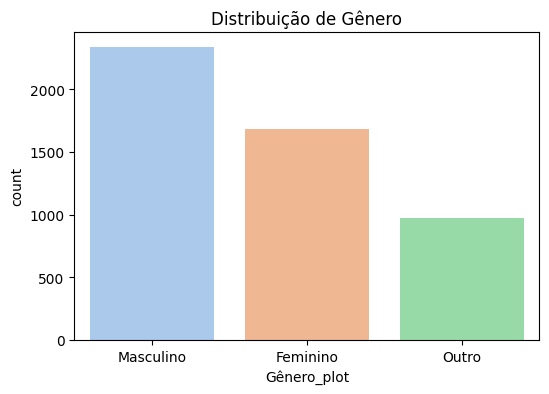

In [197]:
#Distribuição de gênero

plt.figure(figsize=(6, 4))
sns.countplot(data=df_funcionarios, x="Gênero_plot", hue="Gênero_plot", palette="pastel", legend=False)
plt.title("Distribuição de Gênero")
plt.show()


/tmp/ipython-input-198-3532529795.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




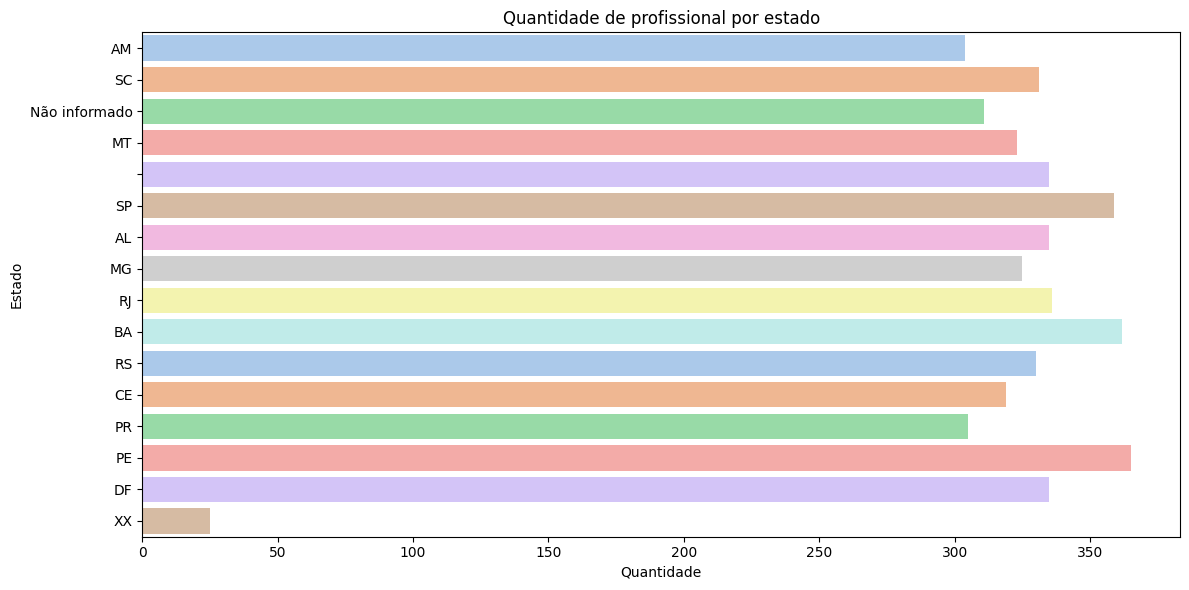

In [198]:
#Profissionais por estado

plt.figure(figsize=(12, 6))
sns.countplot(data=df_funcionarios, y="Estado/UF", palette="pastel")
plt.title("Quantidade de profissional por estado")
plt.xlabel("Quantidade")
plt.ylabel("Estado")
plt.tight_layout()
plt.show()

TRATAMENTO DE VALORES NULOS


Mapa de valores nulos:


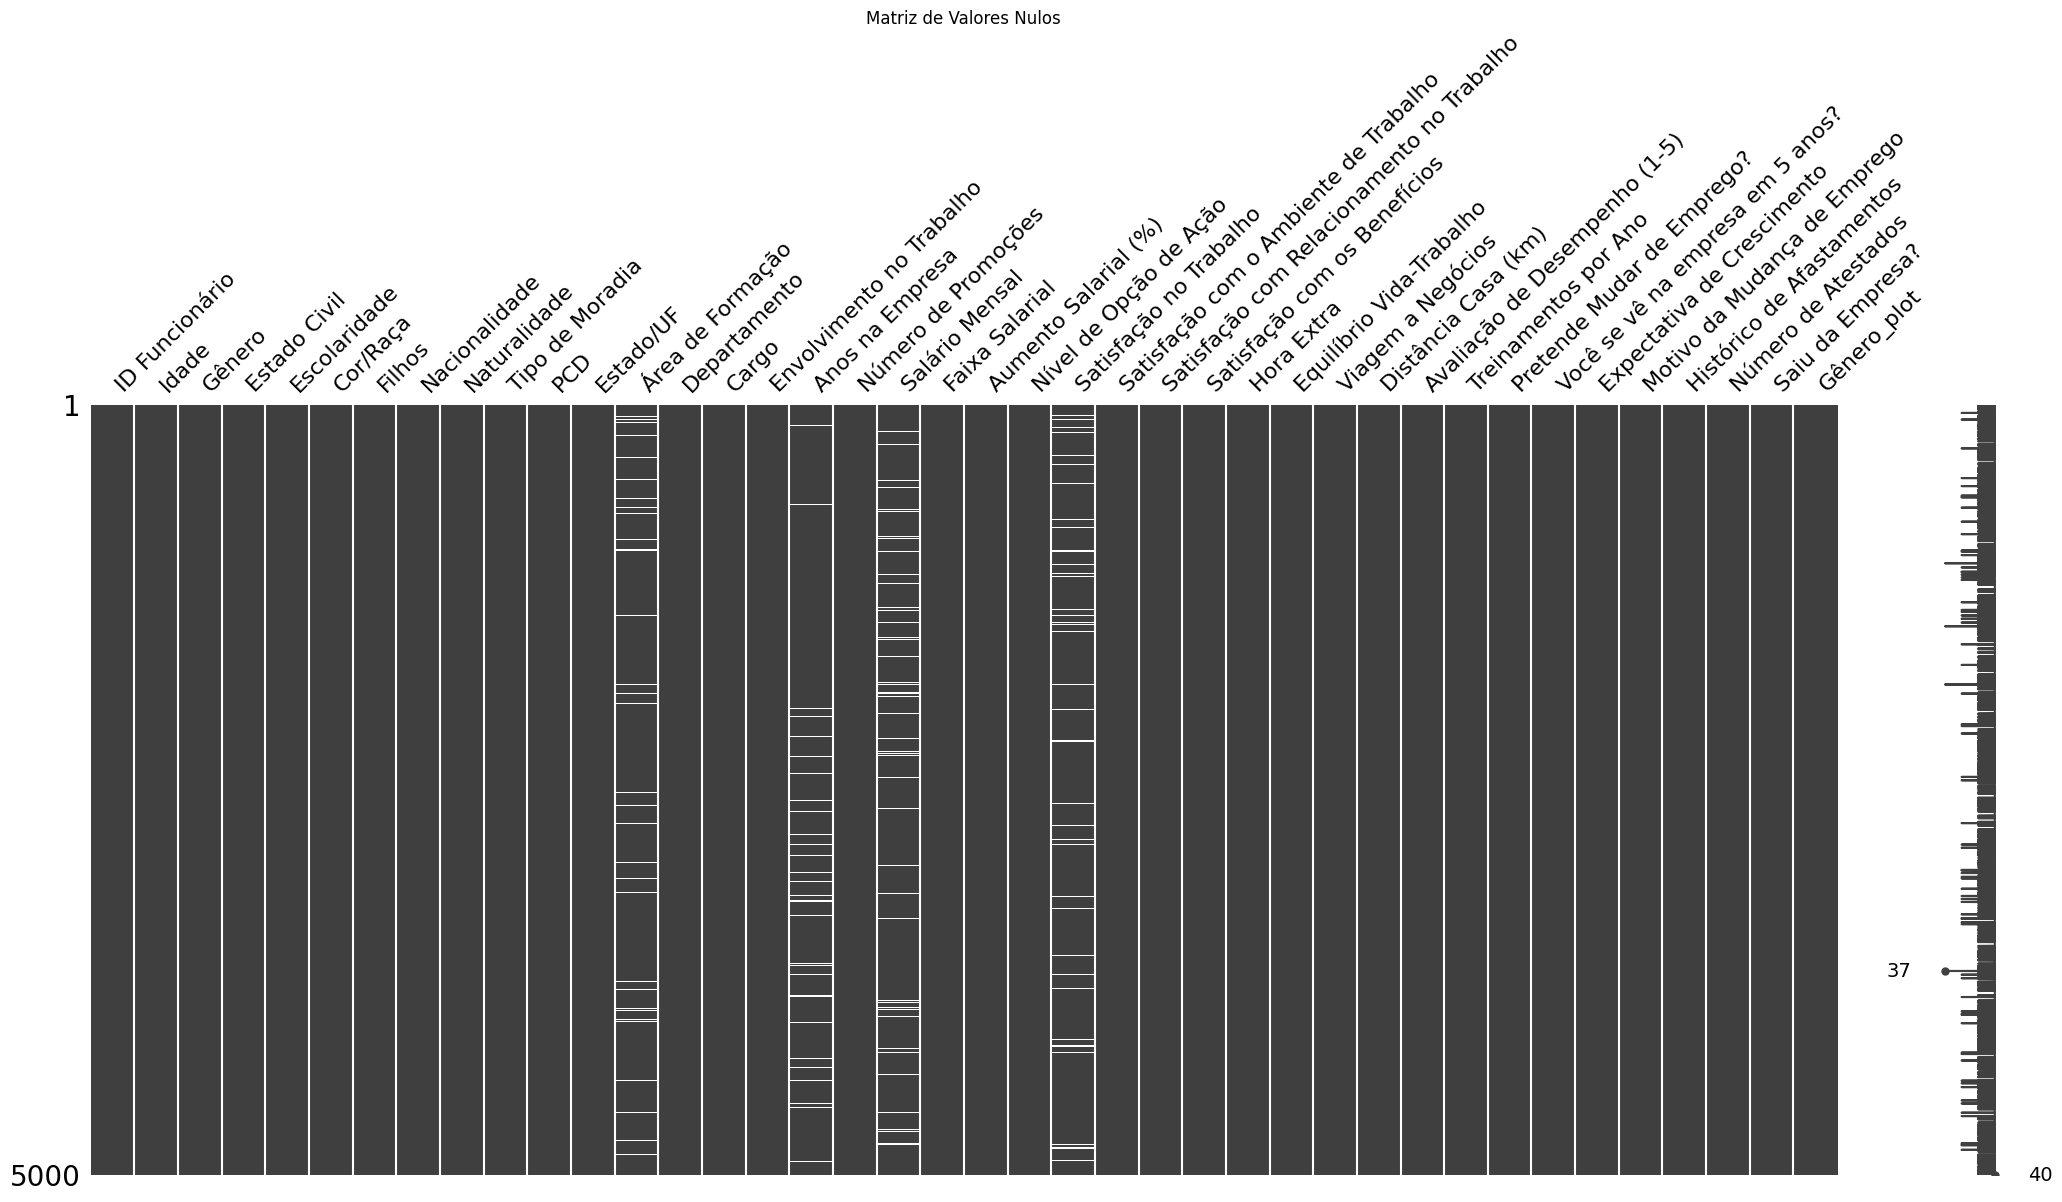


Contagem de valores nulos por coluna:

Anos na Empresa                              250
Salário Mensal                               250
Satisfação no Trabalho                       250
Área de Formação                             250
ID Funcionário                                 0
Idade                                          0
Gênero                                         0
Estado Civil                                   0
Nacionalidade                                  0
Filhos                                         0
Cor/Raça                                       0
Escolaridade                                   0
Estado/UF                                      0
Naturalidade                                   0
PCD                                            0
Tipo de Moradia                                0
Envolvimento no Trabalho                       0
Cargo                                          0
Departamento                                   0
Número de Promoções          

In [199]:
#Visualização de valores nulos

print("\nMapa de valores nulos:")
msno.matrix(df_funcionarios)
plt.title('Matriz de Valores Nulos')
plt.show()
print("\nContagem de valores nulos por coluna:\n")
print(df_funcionarios.isnull().sum().sort_values(ascending=False))

In [200]:
#Imputação para colunas numéricas

df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].median(), inplace=True)

/tmp/ipython-input-200-1791538963.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [201]:
#Imputando mediana

df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median(), inplace=True)

/tmp/ipython-input-201-3101731737.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [202]:
#Imputação para colunas categóricas

df_funcionarios['Área de Formação'].fillna(df_funcionarios['Área de Formação'].mode()[0], inplace=True)
df_funcionarios['Satisfação no Trabalho'].fillna(df_funcionarios['Satisfação no Trabalho'].mode()[0], inplace=True)

/tmp/ipython-input-202-2277369099.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-202-2277369099.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

In [203]:
#Verificar nulos após a imputação

print("\nContagem de valores nulos após imputação:")
print(df_funcionarios.isnull().sum().sort_values(ascending=False))


Contagem de valores nulos após imputação:
ID Funcionário                               0
Idade                                        0
Gênero                                       0
Estado Civil                                 0
Escolaridade                                 0
Cor/Raça                                     0
Filhos                                       0
Nacionalidade                                0
Naturalidade                                 0
Tipo de Moradia                              0
PCD                                          0
Estado/UF                                    0
Área de Formação                             0
Departamento                                 0
Cargo                                        0
Envolvimento no Trabalho                     0
Anos na Empresa                              0
Número de Promoções                          0
Salário Mensal                               0
Faixa Salarial                               0
Aumento Salarial 

In [204]:
#Tratar valores negativos

numeric_cols_to_check_neg = ['Salário Mensal', 'Anos na Empresa', 'Idade', 'NívelCargo',
                             'Envolvimento Trabalho', 'Aumento Salarial', 'Nível Opção Ação',
                             'Satisfaçã Trabalho', 'Satisfação Ambiente', 'Satisfação Relacionamento',
                             'Equilíbrio Vida Trabalho', 'Distância de Casa', 'Avaliação de sempenho',
                             'Treinamentos Ano']

for col in numeric_cols_to_check_neg:
    if col in df_funcionarios.columns:
        df_funcionarios[col] = np.where(df_funcionarios[col] < 0, np.nan, df_funcionarios[col])
        df_funcionarios[col].fillna(df_funcionarios[col].median(), inplace=True)

/tmp/ipython-input-204-1071346609.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [205]:
#Limitação por IQR para Salário Mensal

Q1 = df_funcionarios['Salário Mensal'].quantile(0.25)
Q3 = df_funcionarios['Salário Mensal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [206]:
#Substituir outliers por limites

df_funcionarios['Salário Mensal'] = np.where(df_funcionarios['Salário Mensal'] > upper_bound, upper_bound,
                               np.where(df_funcionarios['Salário Mensal'] < lower_bound, lower_bound, df_funcionarios['Salário Mensal']))

print("\nEstatísticas Descritivas Salário Mensal após tratamento de Outliers:\n")

print(df_funcionarios['Salário Mensal'].describe())


Estatísticas Descritivas Salário Mensal após tratamento de Outliers:

count     5000.000000
mean     13356.136225
std       6600.522585
min       1500.000000
25%       7923.500000
50%      13164.000000
75%      18912.750000
max      35396.625000
Name: Salário Mensal, dtype: float64


In [207]:
if df_funcionarios['Salário Mensal'].notna().any():
	df_funcionarios['Salário Mensal'] = df_funcionarios['Salário Mensal'].fillna(df_funcionarios['Salário Mensal'].mean())

if df_funcionarios['Anos na Empresa'].notna().any():
	df_funcionarios['Anos na Empresa'] = df_funcionarios['Anos na Empresa'].fillna(df_funcionarios['Anos na Empresa'].median())

moda_area = df_funcionarios['Área de Formação'].mode()
if not moda_area.empty:
	df_funcionarios['Área de Formação'] = df_funcionarios['Área de Formação'].fillna(moda_area[0])

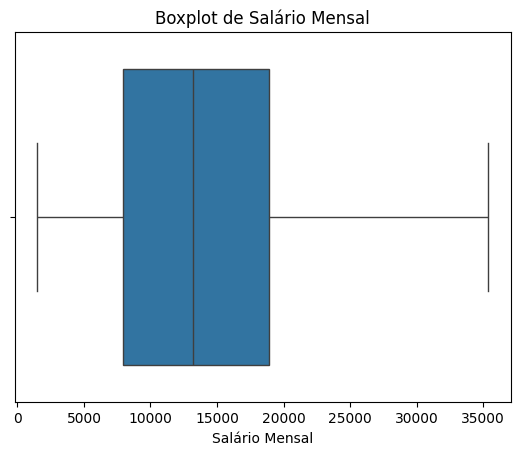

In [208]:
sns.boxplot(data=df_funcionarios, x='Salário Mensal')
plt.title("Boxplot de Salário Mensal")
plt.show()

# Remover outliers acima de 3 desvios padrão

media = df_funcionarios['Salário Mensal'].mean()
desvio = df_funcionarios['Salário Mensal'].std()
limite_superior = media + 3 * desvio
df_funcionarios = df_funcionarios[df_funcionarios['Salário Mensal'] <= limite_superior]

In [209]:
#Calcular a média de salário por idade

salario_por_idade = df_funcionarios.groupby('Idade')['Salário Mensal'].mean()
fig = px.line( salario_por_idade.reset_index(), x = "Idade", y = "Salário Mensal", title = "Média de salário por idade", markers = True)
fig.show()

In [210]:
df_funcionarios['Salário Mensal'].describe()

,Salário Mensal
count,4995.000000
mean,13334.073674
std,6566.861046
min,1500.000000
25%,7911.000000
50%,13164.000000
75%,18900.500000
max,24999.000000


In [211]:
#Tratamento de inconsistências

df_funcionarios['Área de Formação'] = df_funcionarios['Área de Formação'].replace({
    'Desenvolvedor ': 'Desenvolvedor',
    'Dev': 'Desenvolvedor',
    'desenvolvedor': 'Desenvolvedor',
    'Cientista de Dados': 'Cientista de Dados/Data Scientist',
    'Data Scientist': 'Cientista de Dados/Data Scientist',
    'DS': 'Cientista de Dados/Data Scientist'
})

df_funcionarios['Estado/UF'] = df_funcionarios['Estado/UF'].replace('XX', np.nan)

df_funcionarios['Estado/UF'].fillna(df_funcionarios['Estado/UF'].mode()[0], inplace=True)

print("\nContagem de valores únicos em Área de Formação após padronização:\n")
print(df_funcionarios['Área de Formação'].value_counts())

print("\nContagem de valores únicos em Estado/UF após tratamento:\n")
print(df_funcionarios['Estado/UF'].value_counts())



Contagem de valores únicos em Área de Formação após padronização:

Área de Formação
Financeiro                           601
Analista de Dados/Data Analyst       349
Product Manager/PO                   333
Engenharia de Software               324
Pesquisa e Desenvolvimento           321
UX/UI                                320
Vendas                               319
Desenvolvedor                        314
RH                                   313
Administrativo                       307
Suporte Técnico                      306
Prefiro não informar                 305
Cientista de Dados/Data Scientist    297
Marketing                            296
Engenharia de Dados/Data Engineer    290
Name: count, dtype: int64

Contagem de valores únicos em Estado/UF após tratamento:

Estado/UF
PE               385
BA               362
SP               359
RJ               336
DF               335
                 335
AL               335
SC               331
RS               330
MG              

/tmp/ipython-input-211-1391654900.py:14: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [212]:
#Criar nova coluna Idade Categoria

bins_idade = [0, 25, 35, 45, 55, np.inf]
labels_idade = ['Jovem', 'Adulto Jovem', 'Adulto', 'Adulto Maduro', 'Idoso']
df_funcionarios['Idade Categoria'] = pd.cut(df_funcionarios['Idade'], bins=bins_idade, labels=labels_idade, right=False)

In [213]:
df_funcionarios.columns

Index(['ID Funcionário', 'Idade', 'Gênero', 'Estado Civil', 'Escolaridade',
       'Cor/Raça', 'Filhos', 'Nacionalidade', 'Naturalidade',
       'Tipo de Moradia', 'PCD', 'Estado/UF', 'Área de Formação',
       'Departamento', 'Cargo', 'Envolvimento no Trabalho', 'Anos na Empresa',
       'Número de Promoções', 'Salário Mensal', 'Faixa Salarial',
       'Aumento Salarial (%)', 'Nível de Opção de Ação',
       'Satisfação no Trabalho', 'Satisfação com o Ambiente de Trabalho',
       'Satisfação com Relacionamento no Trabalho',
       'Satisfação com os Benefícios', 'Hora Extra',
       'Equilíbrio Vida-Trabalho', 'Viagem a Negócios', 'Distância Casa (km)',
       'Avaliação de Desempenho (1-5)', 'Treinamentos por Ano',
       'Pretende Mudar de Emprego?', 'Você se vê na empresa em 5 anos?',
       'Expectativa de Crescimento', 'Motivo da Mudança de Emprego',
       'Histórico de Afastamentos', 'Número de Atestados', 'Saiu da Empresa?',
       'Gênero_plot', 'Idade Categoria'],
      dty

In [214]:
#Transformar colunas categóricas para análise/modelagem

df_funcionarios = pd.get_dummies(df_funcionarios, columns=['Gênero'], prefix='Genero', dummy_na=False)

In [215]:
#Label Encoding - Saiu da Empresa?

le = LabelEncoder()
df_funcionarios['SaiuDaEmpresa_Encoded'] = le.fit_transform(df_funcionarios['Saiu da Empresa?'])

print("\nPrimeiras 5 linhas após Engenharia de Features:")
print(df_funcionarios.head())



Primeiras 5 linhas após Engenharia de Features:
   ID Funcionário  Idade          Estado Civil          Escolaridade  \
0               1   56.0         Divorciado(a)                   Pós   
1               2   46.0           Solteiro(a)  Prefiro não informar   
2               3   32.0         Divorciado(a)             Graduação   
3               4   25.0         Divorciado(a)             Graduação   
4               5   38.0  Prefiro não informar             Graduação   

   Cor/Raça                Filhos         Nacionalidade          Naturalidade  \
0     Preta                   Sim            Brasileira                    RJ   
1  Indígena                   Sim           Estrangeira                Outros   
2  Indígena                   Sim            Brasileira  Prefiro não informar   
3    Branca                   Não            Brasileira                Outros   
4     Preta  Prefiro não informar  Prefiro não informar                    RJ   

  Tipo de Moradia  PCD  ... Mot

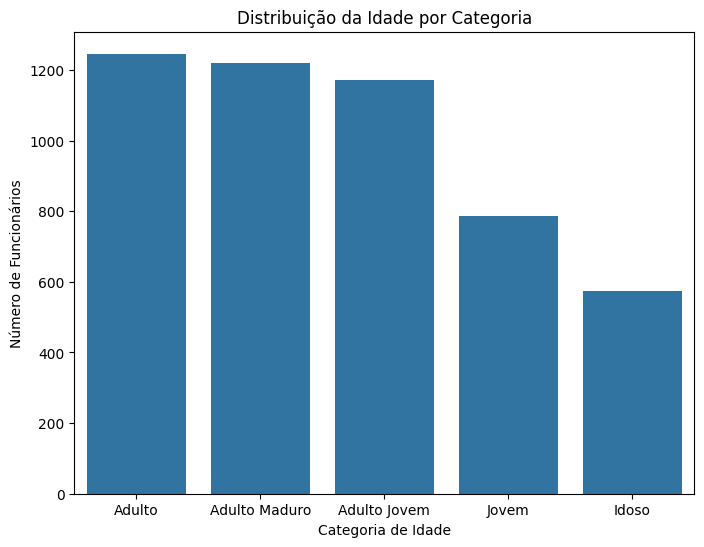

In [216]:
#Dados tratados

plt.figure(figsize=(8, 6))
sns.countplot(data=df_funcionarios, x='Idade Categoria', order=df_funcionarios['Idade Categoria'].value_counts().index)
plt.title('Distribuição da Idade por Categoria')
plt.xlabel('Categoria de Idade')
plt.ylabel('Número de Funcionários')
plt.show()

/tmp/ipython-input-217-4156626352.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





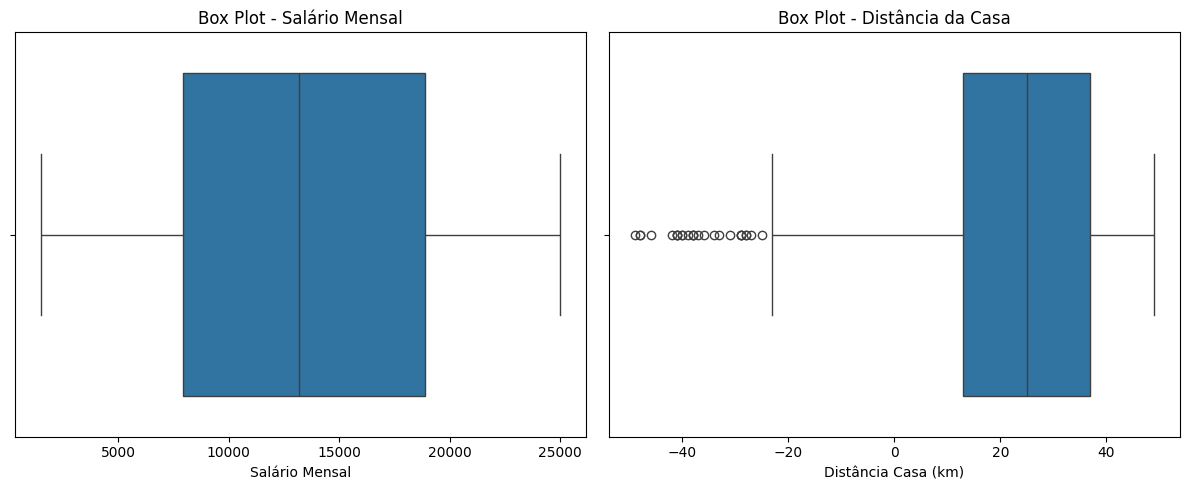

In [217]:
colunas = ['Salário Mensal', 'Distância Casa (km)']

for col in colunas:
    if col in df_funcionarios.columns:
        if df_funcionarios[col].dropna().empty:
            print(f"A coluna '{col}' está vazia ou só tem NaNs.")
        elif not np.issubdtype(df_funcionarios[col].dtype, np.number):
            print(f"A coluna '{col}' não é numérica.")
        else:
            mediana = df_funcionarios[col].median()
            df_funcionarios[col].fillna(mediana, inplace=True)
    else:
        print(f"A coluna '{col}' não existe no DataFrame.")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
if df_funcionarios['Salário Mensal'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Salário Mensal')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Salário Mensal'])
    plt.title('Box Plot - Salário Mensal')

plt.subplot(1, 2, 2)
if df_funcionarios['Distância Casa (km)'].dropna().empty:
    plt.text(0.5, 0.5, 'Sem dados válidos', ha='center', va='center', fontsize=12)
    plt.title('Box Plot - Distância da Casa')
    plt.axis('off')
else:
    sns.boxplot(x=df_funcionarios['Distância Casa (km)'])
    plt.title('Box Plot - Distância da Casa')

plt.tight_layout()
plt.show()

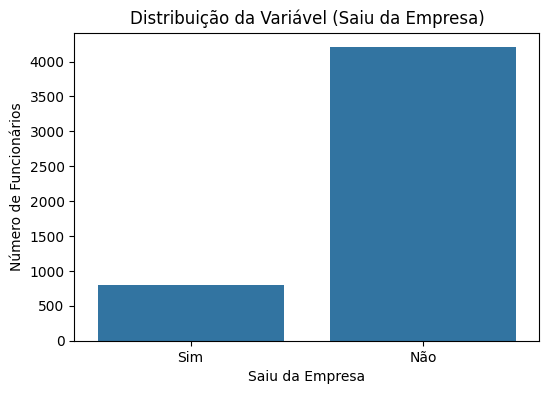

In [218]:
#Target de distribuição de saída da empresa

plt.figure(figsize=(6, 4))
sns.countplot(data=df_funcionarios, x='Saiu da Empresa?')
plt.title('Distribuição da Variável (Saiu da Empresa)')
plt.xlabel('Saiu da Empresa')
plt.ylabel('Número de Funcionários')
plt.show()


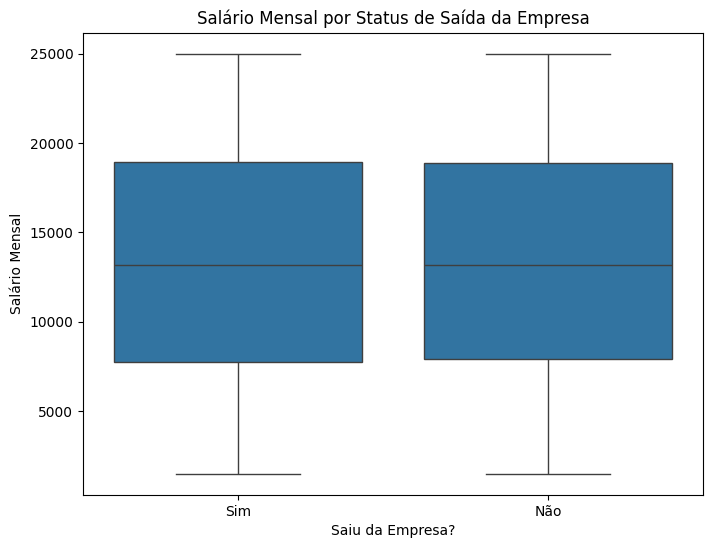

In [219]:
#Relação entre Salário Mensal e Saiu da Empresa

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_funcionarios, x='Saiu da Empresa?', y='Salário Mensal')
plt.title('Salário Mensal por Status de Saída da Empresa')
plt.xlabel('Saiu da Empresa?')
plt.ylabel('Salário Mensal')
plt.show()

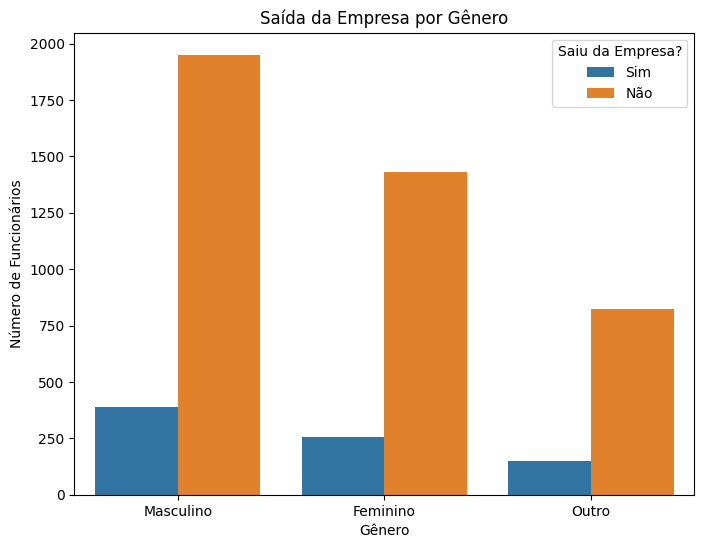

In [220]:
#Análise de saída da empresa por gênero

plt.figure(figsize=(8, 6))
sns.countplot(data=df_funcionarios, x='Gênero_plot', hue='Saiu da Empresa?')
plt.title('Saída da Empresa por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Funcionários')
plt.show()

In [221]:
#Plotly - Saída da empresa por departamento

fig = px.histogram(df_funcionarios, x='Departamento', color='Saiu da Empresa?', title='Saída da Empresa por Departamento')
fig.show()


In [222]:
#Gerar csv

df_funcionarios.to_csv("dados_funcionarios.csv", index=False)

In [223]:
print("\nDataFrame final após tratamento:")
df_funcionarios.info()
print(df_funcionarios.head())


DataFrame final após tratamento:
<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4999
Data columns (total 44 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   ID Funcionário                             4995 non-null   int64   
 1   Idade                                      4995 non-null   float64 
 2   Estado Civil                               4995 non-null   object  
 3   Escolaridade                               4995 non-null   object  
 4   Cor/Raça                                   4995 non-null   object  
 5   Filhos                                     4995 non-null   object  
 6   Nacionalidade                              4995 non-null   object  
 7   Naturalidade                               4995 non-null   object  
 8   Tipo de Moradia                            4995 non-null   object  
 9   PCD                                        4995 non-null

**CRIAÇÃO DA PIPELINE -MACHINE LEARNING**

In [224]:
#Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_fscore_support

#Balanceamento

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [225]:
df = gerar_dataframe(qtd=50, seed=42)

In [226]:
#Pré-processamento - colunas numéricas e categóricas

num_cols = [
    'Salário Mensal', 'Anos na Empresa', 'Idade', 'Envolvimento no Trabalho',
    'Aumento Salarial (%)', 'Nível de Opção de Ação', 'Satisfação no Trabalho',
    'Satisfação com o Ambiente de Trabalho', 'Satisfação com Relacionamento no Trabalho',
    'Equilíbrio Vida-Trabalho', 'Distância Casa (km)', 'Avaliação de Desempenho (1-5)',
    'Treinamentos por Ano'
]

cat_cols = [col for col in df.columns if col not in num_cols + ['ID Funcionário', 'Saiu da Empresa?']]

for col in num_cols:
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat_cols:
    mode = df[col].mode()[0]
    df[col].fillna(mode, inplace=True)

/tmp/ipython-input-226-709115867.py:15: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-226-709115867.py:19: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

In [227]:
#Transformar valores negativos em positivo

for col in num_cols:
    df[col] = df[col].apply(lambda x: abs(x) if x < 0 else x)

In [228]:
#Target

df['target'] = df['Saiu da Empresa?'].map({'Sim': 1, 'Não': 0})

In [229]:
X = df.drop(columns=['ID Funcionário', 'Saiu da Empresa?', 'target'])
y = df['target']


In [230]:
#One-Hot Encoding

X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [231]:
#Treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

In [232]:
#Pipeline com SMOTE (escalonamento e RandomForest)

smote = SMOTE(random_state=42)
scaler = StandardScaler()
clf = RandomForestClassifier(random_state=42, n_estimators=50)

pipeline = ImbPipeline(steps=[
    ('smote', smote),
    ('scaler', scaler),
    ('clf', clf)
])

In [233]:
#Treinar modelo

pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(n_estimators=50, random_state=42))])

In [234]:
#Avaliar modelo

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)[:, 1]

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")

prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, pos_label=1, average='binary')
print(f"Precision: {prec:.4f} | Recall: {rec:.4f} | F1-score: {f1:.4f}")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.00      0.00      0.00         1

    accuracy                           0.90        10
   macro avg       0.45      0.50      0.47        10
weighted avg       0.81      0.90      0.85        10

AUC-ROC: 0.0000
Precision: 0.0000 | Recall: 0.0000 | F1-score: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



/tmp/ipython-input-235-1331965677.py:16: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



<Figure size 1400x1000 with 0 Axes>

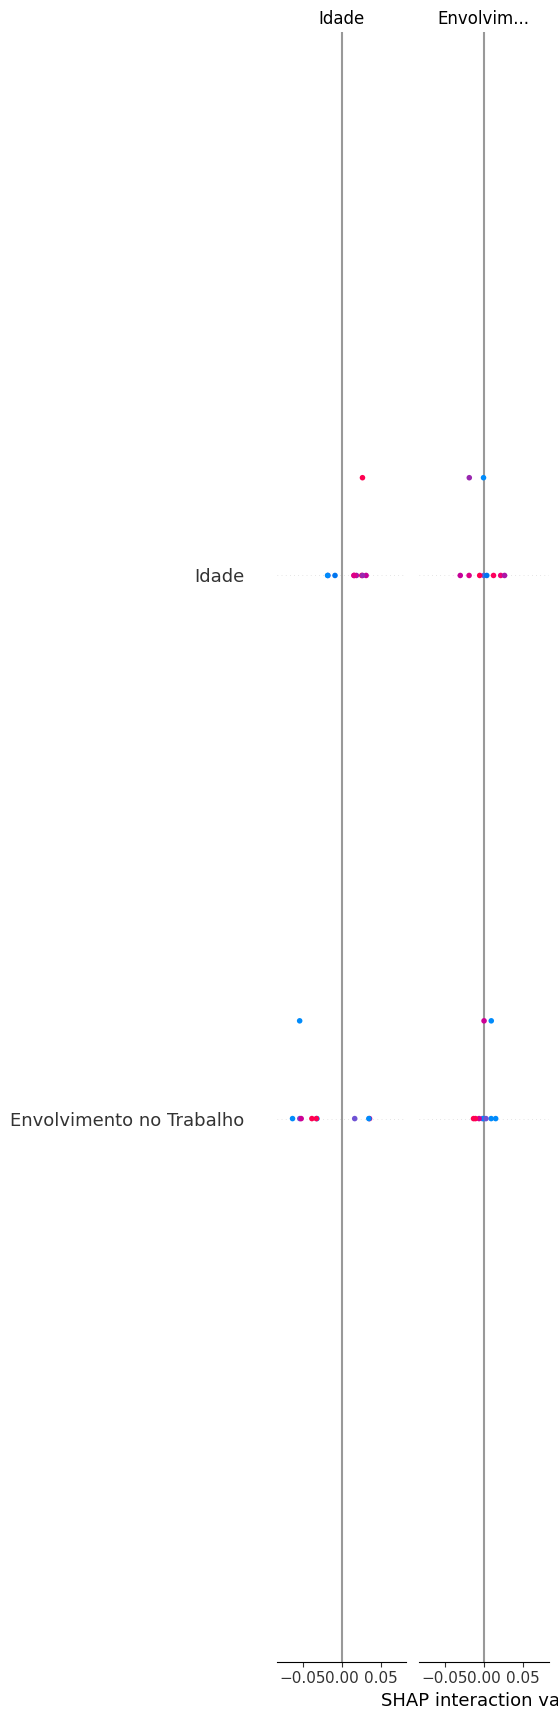

In [235]:
explainer = shap.TreeExplainer(pipeline.named_steps['clf'])

X_test_scaled = pipeline.named_steps['scaler'].transform(X_test)

shap_values = explainer.shap_values(X_test_scaled)

if isinstance(shap_values, list) and len(shap_values) == 2:
    shap_values_to_plot = shap_values[1]
else:
    shap_values_to_plot = shap_values
shap.initjs()

#Visualização maior para evitar texto cortado

plt.figure(figsize=(14, 10))
shap.summary_plot(
    shap_values_to_plot,
    X_test_scaled,
    feature_names=X_test.columns,
    max_display=20
)


In [247]:
#Risco médio por departamento

df_test = df.loc[X_test.index].copy()
df_test['Prob_Saida'] = y_proba

risco_depto = df_test.groupby('Departamento')['Prob_Saida'].mean().reset_index()

fig = px.bar(
    risco_depto,
    x='Departamento',
    y='Prob_Saida',
    title='Probabilidade Média de Saída por Departamento',
    labels={'Prob_Saida': 'Probabilidade Média de Saída'}
)
fig.show()

**INSTALAÇÕES NO GOOGLE COLABORE**

In [169]:
!pip install jupyter-dash dash-bootstrap-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.8 MB/s eta 0:00:00


In [ ]:
%pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 16.0 MB/s eta 0:00:00
